# second order ODE using scipy

total time for run: 0.0
total time for run: 0.0
total time for run: 0.0


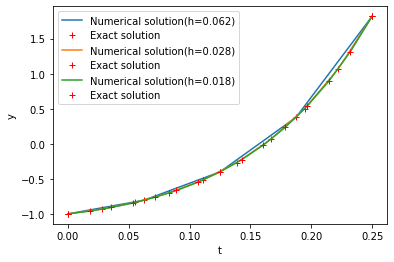

In [15]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import time
plt.figure()
for i in range(1,4):
    s = time.time()
    def ode(t, y):
        return np.array([y[1], 5 * t + 10 * y[1] - 9 * y[0]])

    t_eval = np.linspace(0, 0.25, num=5*i)
    sol = solve_ivp(ode, (0, 0.25), [-1, 2], t_eval=t_eval)

    exact = (50/81) + (5/9) * sol.t + (31/81) * np.exp(9 * sol.t) - 2 * np.exp(sol.t)
    e = time.time()
    print('total time for run:',e-s)
    plt.plot(sol.t, sol.y[0], '-', label="Numerical solution(h={})".format(round(t_eval[1]-t_eval[0],3)))
    plt.plot(sol.t, exact, '+r', label='Exact solution')
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('y')
    #plt.show()


total time for run: 0.0


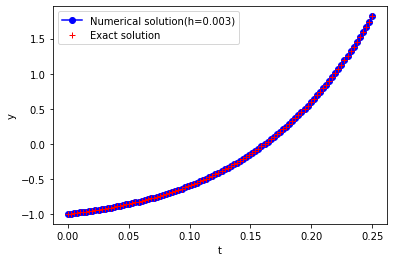

In [16]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import time
s = time.time()
def ode(t, y):
    return np.array([y[1], 5 * t + 10 * y[1] - 9 * y[0]])

t_eval = np.linspace(0, 0.25, num=100)
sol = solve_ivp(ode, (0, 0.25), [-1, 2], t_eval=t_eval)

exact = (50/81) + (5/9) * sol.t + (31/81) * np.exp(9 * sol.t) - 2 * np.exp(sol.t)
e = time.time()
print('total time for run:',e-s)
plt.plot(sol.t, sol.y[0], '-bo', label="Numerical solution(h={})".format(round(t_eval[1]-t_eval[0],3)))
plt.plot(sol.t, exact, '+r', label='Exact solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.show()


# second order ode using DeepXde

1682686119.1982236
Compiling model...
Building feed-forward neural network...
'build' took 0.051559 s



C:\Users\mayur\anaconda3\lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:103: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.461284 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric   
0         [9.24e-02, 1.00e+00, 2.98e+00]    [9.33e-02, 1.00e+00, 2.98e+00]    [9.86e-01]    
1000      [1.13e+00, 8.07e-01, 8.43e-01]    [1.01e+00, 8.07e-01, 8.43e-01]    [9.30e-01]    
2000      [1.53e-04, 2.18e-07, 3.02e-07]    [2.59e-04, 2.18e-07, 3.02e-07]    [4.41e-04]    
3000      [5.91e-05, 2.28e-08, 1.84e-07]    [1.18e-04, 2.28e-08, 1.84e-07]    [1.57e-04]    
4000      [4.40e-05, 8.05e-10, 1.22e-08]    [8.38e-05, 8.05e-10, 1.22e-08]    [5.32e-05]    
5000      [3.90e-02, 7.18e-05, 2.92e-02]    [4.03e-02, 7.18e-05, 2.92e-02]    [1.57e-02]    
6000      [1.88e-04, 1.36e-06, 1.19e-04]    [2.43e-04, 1.36e-06, 1.19e-04]    [1.36e-03]    
7000      [1.81e-05, 2.11e-11, 2.55e-09]    [3.42e-05, 2.11e-11, 2.55e-09]    [2.03e-05]    
8000      [1.41e-05, 1.11e-11, 2.33e-08]    [2.69e-05, 1.11e-11, 2.33e-08]    [7.74e-05]   

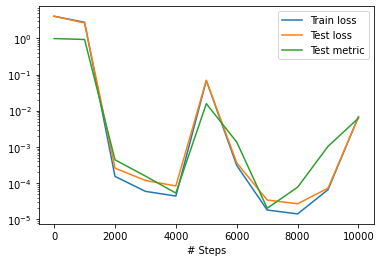

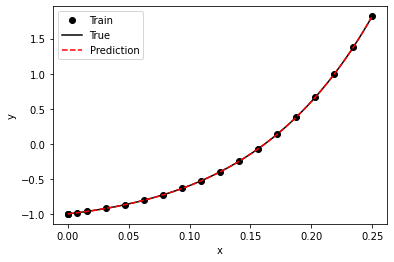

1682686128.1330967
Total time of run: 8.934873104095459


In [19]:
import deepxde as dde
import numpy as np
import time
s = time.time()
def ode(t, y):
    dy_dt = dde.grad.jacobian(y, t)
    d2y_dt2 = dde.grad.hessian(y, t)
    return d2y_dt2 - 10 * dy_dt + 9 * y - 5 * t


def func(t):
    return 50 / 81 + t * 5 / 9 - 2 * np.exp(t) + (31 / 81) * np.exp(9 * t)


geom = dde.geometry.TimeDomain(0, 0.25)


def boundary_l(t, on_initial):
    return on_initial and np.isclose(t[0], 0)


def bc_func1(inputs, outputs, X):
    return outputs + 1


def bc_func2(inputs, outputs, X):
    return dde.grad.jacobian(outputs, inputs, i=0, j=None) - 2


ic1 = dde.icbc.IC(geom, lambda x: -1, lambda _, on_initial: on_initial)
ic2 = dde.icbc.OperatorBC(geom, bc_func2, boundary_l)

data = dde.data.TimePDE(geom, ode, [ic1, ic2], 16, 2, solution=func, num_test=500)
layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile(
    "adam", lr=0.001, metrics=["l2 relative error"], loss_weights=[0.01, 1, 1]
)


losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)
e = time.time()
print('Total time of run:', e-s)


In [16]:
print(time.time())
s = time.time()
for i in range(100000000):
    x = i+10
print(time.time())
e = time.time()
e-s

1682686020.971013
1682686029.2036731


8.232660055160522